In [1]:
import matplotlib.pyplot as plt
import soda

First, create an object with the coordinates of the solar site of interest

In [2]:
lat = 33.9533
lon = -117.3962

site = soda.SolarSite(lat,lon)

Then, specify the year and a boolean that checks for leap year days. Interval is the NSRDB resolution (max is 30 min). utc=False returns the file in local time (this is needed to generate the solar power). Date is the day of interest to obtain the solar time series.

In [3]:
year = "2015"
leap_year = False
interval = "30"
utc = False
date = "2015-01-10"
df = site.get_nsrdb_data(year,leap_year,interval,utc)

C:\Users\Ignac\Anaconda3\envs\pysoda\lib\site-packages\pandas\core\frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


We can plot the 30-min averaged irradiance

Text(0, 0.5, 'GHI (W/$m^2$)')

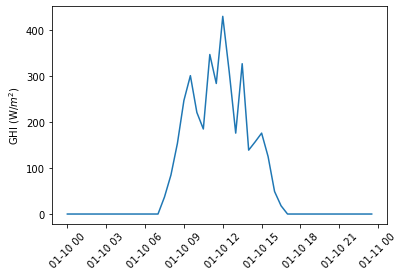

In [4]:
plt.plot(df["GHI"].loc[date])
plt.xticks(rotation=45)
plt.ylabel("GHI (W/$m^2$)")

To generate the 30-min solar time series, you must specify the solar panel configuration. E.g. Capacity in MW, inverter sizing (DC-AC ratio), panel tilt in degrees, azimuth, inverter efficiency in %, system losses in %, and array type  (0=Fixed, 1=Fixed Roof, 2=1 Axis Tracker, 3=Backtracted, 4=2 Axis Tracker)

In [5]:
clearsky = False
capacity = 1
DC_AC_ratio = 1.2
tilt = 33
azimuth = 180
inv_eff = 96
losses = 15
array_type = 0

pwr = site.generate_solar_power_from_nsrdb(clearsky,capacity,DC_AC_ratio,tilt,azimuth,inv_eff,losses,array_type)

Plot the 30-min solar power results

Text(0, 0.5, 'AC power (MW)')

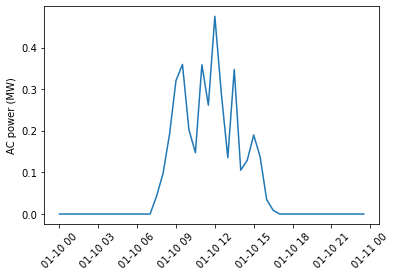

In [6]:
plt.plot(pwr[date])
plt.xticks(rotation=45)
plt.ylabel("AC power (MW)")

Now generate the stochastic time series every 5 seconds

In [7]:
resolution = "5S"

solar_data = site.generate_high_resolution_power_data(resolution, date)

C:\Users\Ignac\Dropbox (ASU)\Ignacio\Python\CIGAR\SoDa\soda\solar_data.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CloudType"] = ct[df.index]


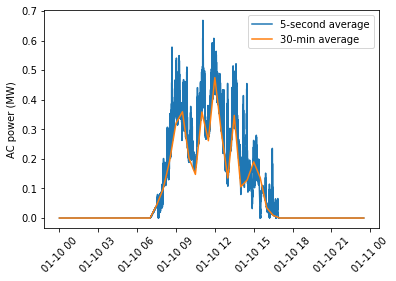

In [8]:
plt.plot(solar_data,label="5-second average")
plt.plot(pwr[date],label="30-min average")
plt.xticks(rotation=45)
plt.ylabel("AC power (MW)")
plt.legend()